<a href="https://colab.research.google.com/github/HenHimA1/A1/blob/master/House_2REDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
label = pd.read_csv("/content/labels.dat", delim_whitespace=True, names=["Nomor","Type"])

In [3]:
data = pd.read_csv('/content/channel_1.dat', delim_whitespace=True, names=["Times","Mains 1"])
data = pd.DataFrame(index=data["Times"])
for i in range(1,12):
  lokasi = '/content/channel_%s.dat' % i
  tipe = label.iloc[i-1]["Type"]
  data1 = pd.read_csv(lokasi, delim_whitespace=True, names=["Times", tipe], index_col=["Times"])
  data[tipe] = data1[tipe]

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
data = data.fillna(0)

In [5]:
data.head()

,mains1,mains2,kitchen_outlets1,lighting,stove,microwave,washer_dryer,kitchen_outlets2,refrigerator,dishwaser,disposal
Times,,,,,,,,,,,
1303082307,16.57,290.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1303082308,16.55,289.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1303082309,16.64,289.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1303082310,16.61,289.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1303082311,16.72,304.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data1 = data

In [7]:
import datetime
data1.index = [datetime.datetime.fromtimestamp(waktu) for waktu in data.index]

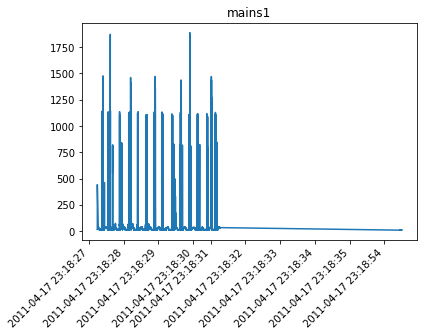

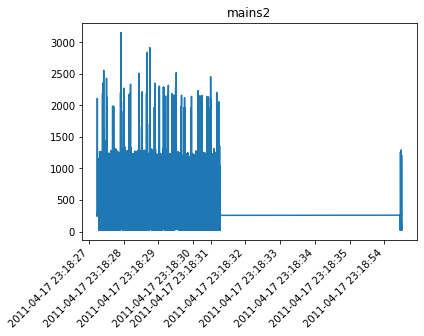

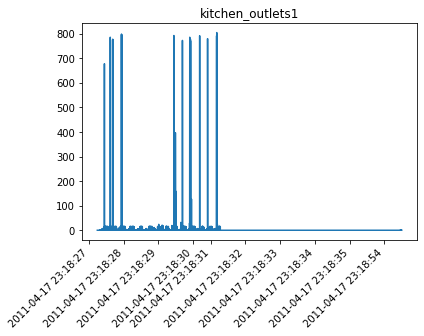

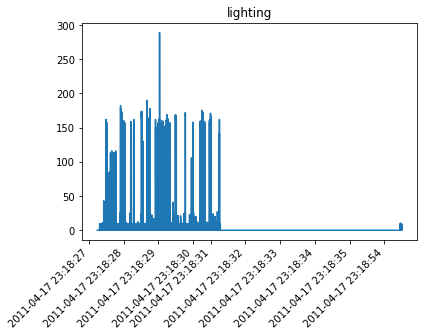

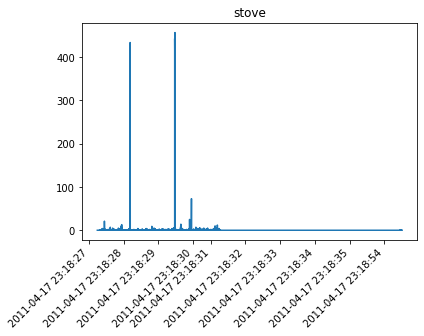

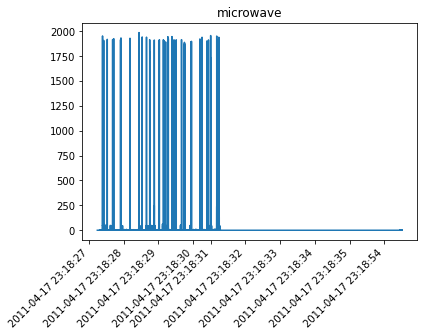

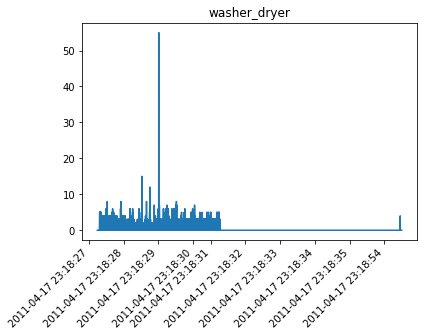

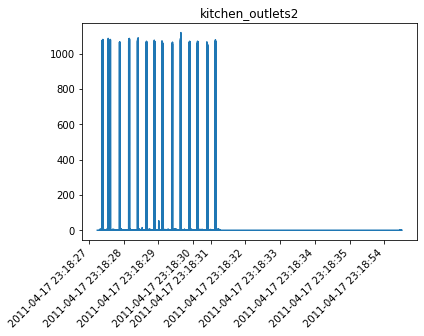

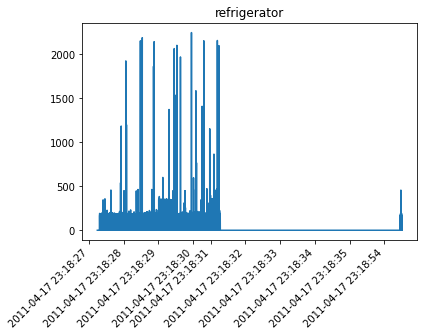

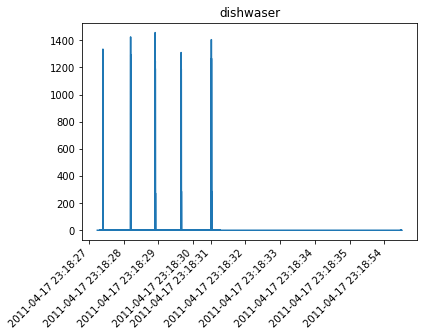

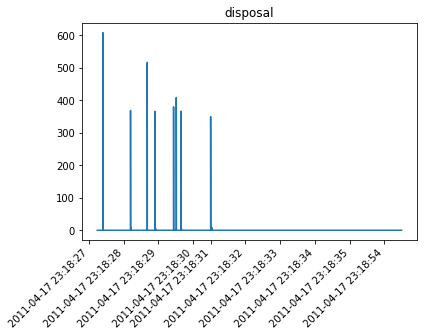

In [8]:
import matplotlib.pyplot as plt
for i in label["Type"]:
  fig = plt.figure()
  axes = fig.add_subplot(111)
  plt.title(i)
  axes.plot(data1.index,data[i])
  axes.set_xticklabels(data1.index, rotation = 45, ha="right")
  # axes.set_xticks(np.arange(1,len(data1.index),7))
  plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1["mains1"], data1.drop(['mains1', 'mains2'], axis=1), test_size=0.30, random_state=42)

In [10]:
X_train = X_train.sort_index()
X_test = X_test.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()

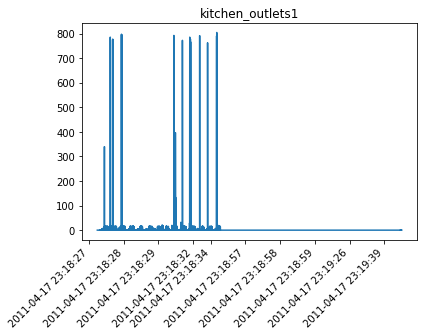

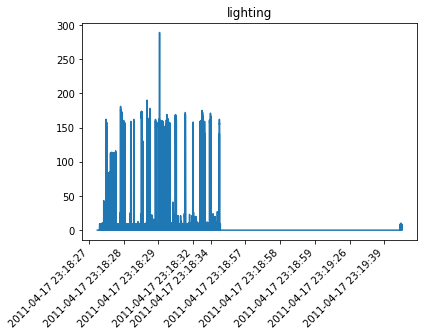

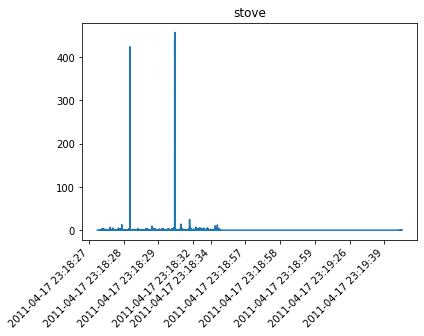

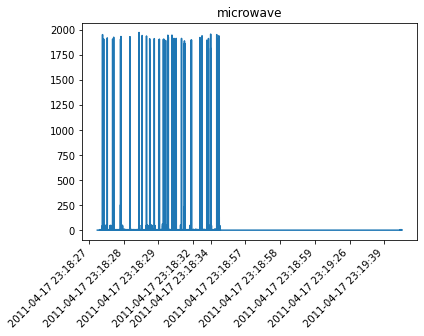

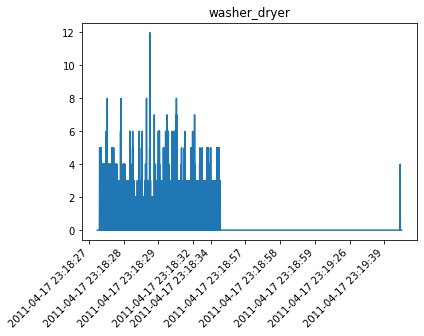

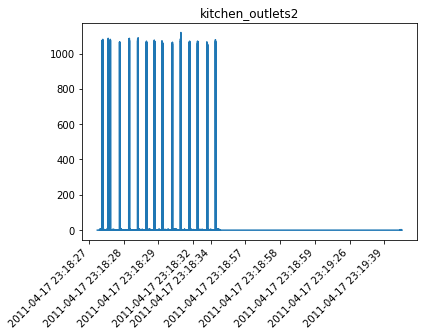

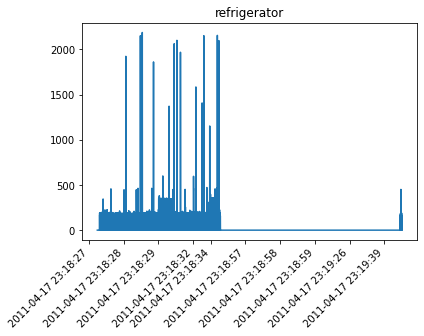

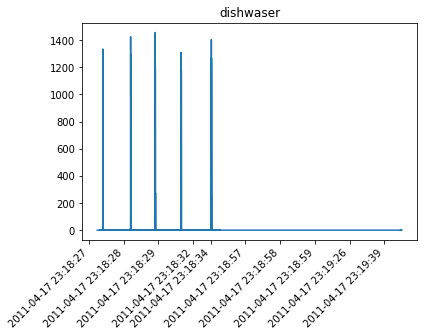

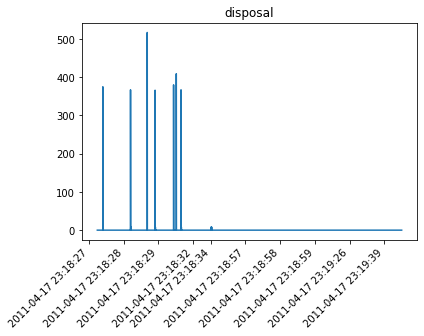

In [11]:
for i in data1.drop(['mains1', 'mains2'], axis=1).columns:
  nilai = 0
  fig = plt.figure()
  axes = fig.add_subplot(111)
  plt.title(i)
  axes.plot(X_train.index,y_train[i])
  nilai += 1
  axes.set_xticklabels(X_test.index, rotation = 45, ha="right")
  plt.show()

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
MSE = []
for i in range(1,10):
  knn = KNeighborsRegressor(n_neighbors=i,weights='distance')
  knn.fit(X_train.to_numpy().reshape(-1,1),y_train)
  prediksi = knn.predict(X_test.to_numpy().reshape(-1,1))
  MSE.append(mean_squared_error(y_test.to_numpy(),prediksi))
# print(y_test.to_numpy().shape)
# print(prediksi.shape)

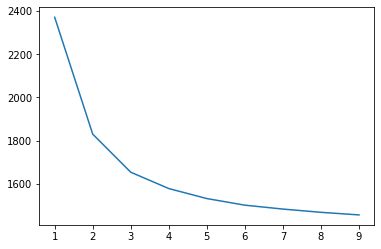

In [13]:
plt.plot(range(1,10), MSE)
plt.show()

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
knn = KNeighborsRegressor(n_neighbors=9, weights='distance')
knn.fit(X_train.to_numpy().reshape(-1,1),y_train)
prediksi = knn.predict(X_test.to_numpy().reshape(-1,1))

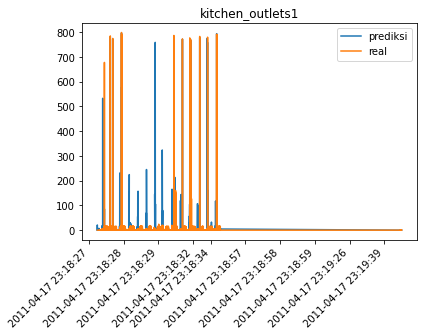

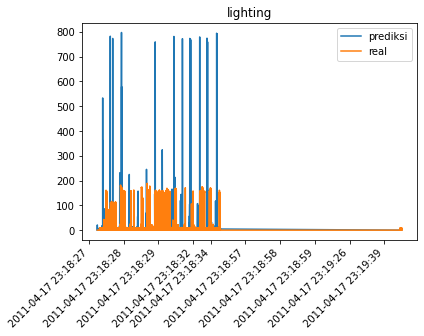

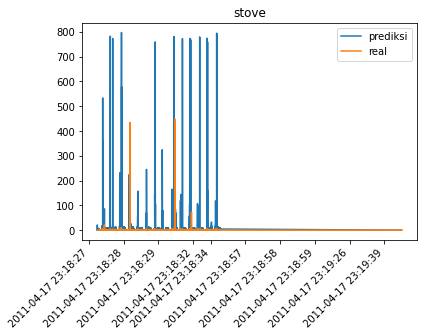

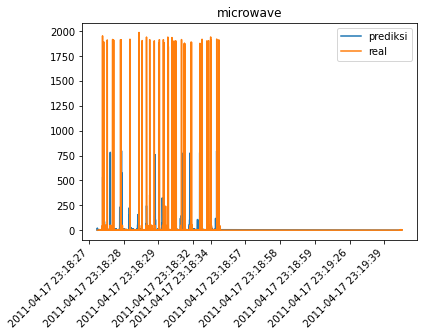

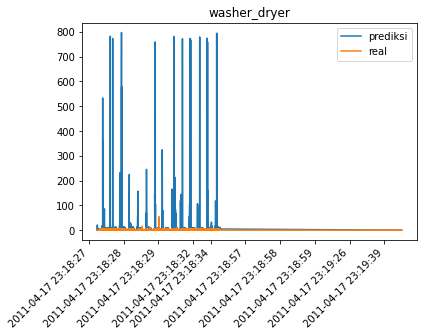

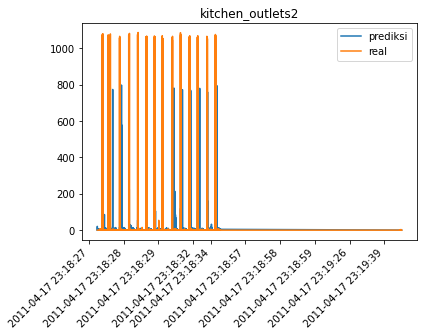

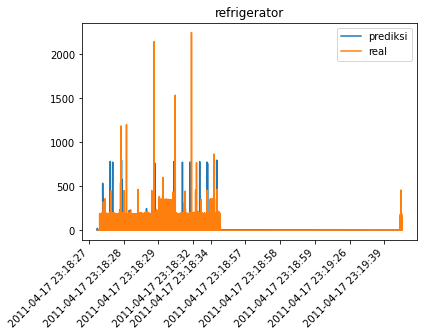

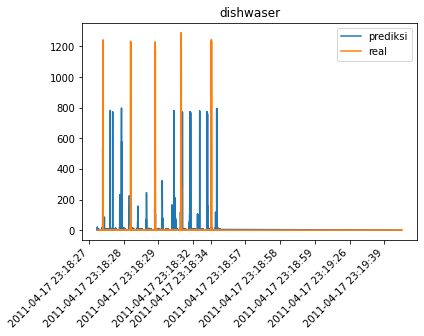

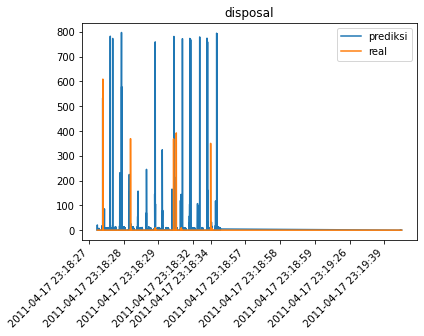

In [17]:
for i in data1.drop(['mains1', 'mains2'], axis=1).columns:
  nilai = 0
  fig = plt.figure()
  axes = fig.add_subplot(111)
  plt.title(i)
  axes.plot(X_test.index,prediksi[:,nilai], label="prediksi")
  axes.plot(X_test.index,y_test[i], label="real")
  nilai += 1
  axes.set_xticklabels(X_test.index, rotation = 45, ha="right")
  plt.legend()
  plt.show()